In [1]:
# Advanced Machine Learning: Project - 1

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import warnings

warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, StackingClassifier, BaggingClassifier 

In [4]:
df = pd.read_csv('Apps_data.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10841 entries, 0 to 10840

Data columns (total 13 columns):

 #   Column          Non-Null Count  Dtype  

---  ------          --------------  -----  

 0   App             10841 non-null  object 

 1   Category        10841 non-null  object 

 2   Rating          9367 non-null   float64

 3   Reviews         10841 non-null  object 

 4   Size            10841 non-null  object 

 5   Installs        10841 non-null  object 

 6   Type            10840 non-null  object 

 7   Price           10841 non-null  object 

 8   Content Rating  10840 non-null  object 

 9   Genres          10841 non-null  object 

 10  Last Updated    10841 non-null  object 

 11  Current Ver     10833 non-null  object 

 12  Android Ver     10838 non-null  object 

dtypes: float64(1), object(12)

memory usage: 1.1+ MB


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Data cleansing and Exploratory data analysis:

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [7]:
df.select_dtypes(include=object).describe().transpose()

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [8]:
# columns that need to be worked upon for model building :
# 1. Reviews - To be converted to numeric values
# 2. Type - To be converted to numeric values
# 3. Installs - To be converted to numeric values
# 4. Price - To be converted to numeric values

In [9]:
# Check if there are any duplicate records in the dataset? If any drop them.

In [10]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


In [11]:
#Dropping duplicates in 'Apps_data.csv' -

df.drop_duplicates('App',inplace=True)

In [12]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [13]:
# Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them.

df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [14]:
df = df.drop(df[df['Category']=='1.9'].index)

In [15]:
# Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.

In [16]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [17]:
df.dropna(inplace=True)
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [18]:
# converting ratings to high and low categories :

Rating_category = dict()

for n in range(0,len(df['Rating'])):
    if df['Rating'].iloc[n] >= 3.5:
        Rating_category[n] = 'High'
    else:
        Rating_category[n] = 'Low'

In [19]:
#Adding the column 'Rating_category' to the original dataframe :

df['Rating_category'] = pd.Series(Rating_category).values
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,High


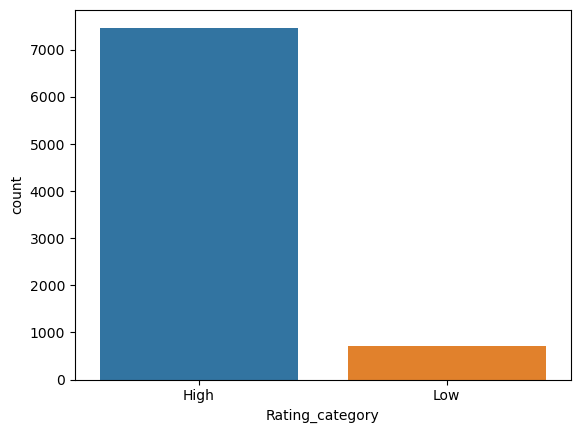

In [20]:
# Check the distribution of the newly created column 'Rating_category' and comment on the distribution :

sns.countplot(df, x='Rating_category')
plt.show()

In [21]:
# Comments :

# We can see that the distribution is very unequal.

In [22]:
# Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers using transformation approach.

df['Reviews'] = df.Reviews.apply(pd.to_numeric, errors='coerce')
df['Reviews'].dtype

dtype('int64')

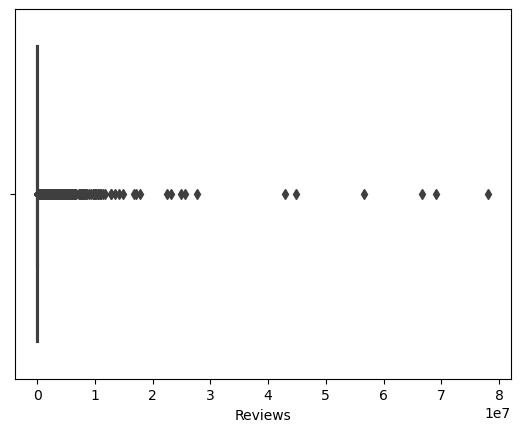

In [23]:
# Boxplot before tranformation :

sns.boxplot(df, x='Reviews')
plt.show()

In [24]:
# Handling outliears through Box Transformation approach :

df['Reviews'],fitted_lambda = scipy.stats.boxcox(df['Reviews'] , lmbda=None)

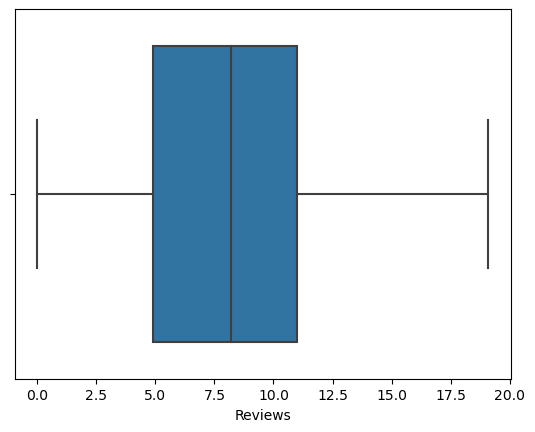

In [25]:
# Boxplot after tranformation :

sns.boxplot(df, x='Reviews')
plt.show()

In [26]:
# The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype:

In [27]:
# Dropping the entries where size='Varies with device':

df = df[df['Size']!='Varies with device']

In [28]:
# Converting entries and replacing M with 1 million and k with 1 thousand :

def converting(item):
    
        if item[-1]=='k':
            new=float(item.replace('k',''))*1000
            
        else:
            new=float(item.replace('M',''))*1000000
            
        return new

In [29]:
df['Size']= df['Size'].apply(lambda x:converting(x))

In [30]:
df['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

In [31]:
# Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype :

In [32]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000+', '500,000,000+', '100+', '500+', '10+', '1,000,000,000+',
       '5+', '50+', '1+'], dtype=object)

In [33]:
df['Installs'] = df['Installs'].str.replace(',','').str.replace('+','')

In [34]:
# Convert the column to numeric type :

df['Installs'] = df.Installs.apply(pd.to_numeric, errors='coerce')

In [35]:
df['Installs'].unique()

array([     10000,     500000,    5000000,   50000000,     100000,
            50000,    1000000,   10000000,       5000,  100000000,
             1000,  500000000,        100,        500,         10,
       1000000000,          5,         50,          1], dtype=int64)

In [36]:
# Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype:

In [37]:
df['Price'].unique()

array(['0', '$4.99', '$6.99', '$7.99', '$3.99', '$5.99', '$2.99', '$1.99',
       '$9.99', '$0.99', '$9.00', '$5.49', '$10.00', '$24.99', '$11.99',
       '$79.99', '$16.99', '$14.99', '$29.99', '$12.99', '$3.49',
       '$10.99', '$7.49', '$1.50', '$19.99', '$15.99', '$33.99', '$39.99',
       '$2.49', '$4.49', '$1.70', '$1.49', '$3.88', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$1.59',
       '$6.49', '$1.29', '$299.99', '$379.99', '$37.99', '$18.99',
       '$389.99', '$8.49', '$1.75', '$14.00', '$2.00', '$3.08', '$2.59',
       '$19.40', '$15.46', '$8.99', '$3.04', '$13.99', '$4.29', '$3.28',
       '$4.60', '$1.00', '$2.90', '$1.97', '$2.56', '$1.20'], dtype=object)

In [38]:
df['Price'] = df['Price'].str.replace('$', '')

In [39]:
# convert column to numeric type :

df['Price'] = df.Price.apply(pd.to_numeric, errors='coerce')

In [40]:
df['Price'].unique()

array([  0.  ,   4.99,   6.99,   7.99,   3.99,   5.99,   2.99,   1.99,
         9.99,   0.99,   9.  ,   5.49,  10.  ,  24.99,  11.99,  79.99,
        16.99,  14.99,  29.99,  12.99,   3.49,  10.99,   7.49,   1.5 ,
        19.99,  15.99,  33.99,  39.99,   2.49,   4.49,   1.7 ,   1.49,
         3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,
         1.61,   1.59,   6.49,   1.29, 299.99, 379.99,  37.99,  18.99,
       389.99,   8.49,   1.75,  14.  ,   2.  ,   3.08,   2.59,  19.4 ,
        15.46,   8.99,   3.04,  13.99,   4.29,   3.28,   4.6 ,   1.  ,
         2.9 ,   1.97,   2.56,   1.2 ])

In [41]:
# Drop the columns which you think redundant for the analysis:

df = df.drop(['Rating','Current Ver','Android Ver','App','Genres','Last Updated',], axis = 1)

In [42]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.139169,19000000.0,10000,Free,0.0,Everyone,High
1,ART_AND_DESIGN,7.003849,14000000.0,500000,Free,0.0,Everyone,High
2,ART_AND_DESIGN,11.737722,8700000.0,5000000,Free,0.0,Everyone,High
3,ART_AND_DESIGN,12.699316,25000000.0,50000000,Free,0.0,Teen,High
4,ART_AND_DESIGN,7.003849,2800000.0,100000,Free,0.0,Everyone,High


In [43]:
# For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0:

df['Rating_category'] = df['Rating_category'].replace({'High':1, 'Low':0})

In [44]:
df['Rating_category'].unique()

array([1, 0], dtype=int64)

In [45]:
# Encoding categorical variables using LabelEncoder:

encodedvar = [i for i in df.columns if df.dtypes[i] == object]
encodedvar

label = LabelEncoder()

def encoding(df):
    for i in encodedvar:
        k = label.fit_transform(df[i].astype(str))  
        df[i] = k                              
        df[i] = df[i].astype(int)
        
encoding(df)

In [46]:
# Segregate the target and independent features :

x = df.drop('Rating_category', axis=1)
y = df['Rating_category']

In [47]:
# Split the dataset into train and test :

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=31)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(5265, 7) (1756, 7)

(5265,) (1756,)


In [48]:
# Standardizing the data using MinMax Scaling approach :

mm = MinMaxScaler()

x_train.iloc[:,:] = mm.fit_transform(x_train.iloc[:,:])
x_test.iloc[:,:] = mm.transform(x_test.iloc[:,:])

In [49]:
# Model training, and testing:

In [50]:
def modelfittings(model, x_train, x_test, y_train, y_test):
    
    model.fit(x_train, y_train)
    predicts = model.predict(x_test)
    
    train_scores = model.score(x_train, y_train)
    test_scores = model.score(x_test, y_test)

    print(train_scores, test_scores)
    
    print("\n Confusion Matrix: \n ", confusion_matrix(y_test, predicts))
    print(classification_report(y_test, predicts))

In [51]:
# Decision Tree :

DTC = DecisionTreeClassifier()

modelfittings(DTC, x_train, x_test, y_train, y_test)

1.0 0.8399772209567198



 Confusion Matrix: 

  [[  41  150]

 [ 131 1434]]

              precision    recall  f1-score   support



           0       0.24      0.21      0.23       191

           1       0.91      0.92      0.91      1565



    accuracy                           0.84      1756

   macro avg       0.57      0.57      0.57      1756

weighted avg       0.83      0.84      0.84      1756




In [52]:
# Random Forest Classifier :

RFC = RandomForestClassifier()

modelfittings(RFC, x_train, x_test, y_train, y_test)

1.0 0.8900911161731208



 Confusion Matrix: 

  [[  10  181]

 [  12 1553]]

              precision    recall  f1-score   support



           0       0.45      0.05      0.09       191

           1       0.90      0.99      0.94      1565



    accuracy                           0.89      1756

   macro avg       0.68      0.52      0.52      1756

weighted avg       0.85      0.89      0.85      1756




In [53]:
# Bagging Classifier :

BC = BaggingClassifier()

modelfittings(BC, x_train, x_test, y_train, y_test)

0.9918328584995252 0.873006833712984



 Confusion Matrix: 

  [[  27  164]

 [  59 1506]]

              precision    recall  f1-score   support



           0       0.31      0.14      0.19       191

           1       0.90      0.96      0.93      1565



    accuracy                           0.87      1756

   macro avg       0.61      0.55      0.56      1756

weighted avg       0.84      0.87      0.85      1756




In [54]:
# Gradient Boosting Classifier :

GBC = GradientBoostingClassifier()

modelfittings(GBC, x_train, x_test, y_train, y_test)

0.9133903133903134 0.8883826879271071



 Confusion Matrix: 

  [[   0  191]

 [   5 1560]]

              precision    recall  f1-score   support



           0       0.00      0.00      0.00       191

           1       0.89      1.00      0.94      1565



    accuracy                           0.89      1756

   macro avg       0.45      0.50      0.47      1756

weighted avg       0.79      0.89      0.84      1756




In [55]:
# Ada Boost Classifier :

ABC = AdaBoostClassifier()

modelfittings(ABC, x_train, x_test, y_train, y_test)

0.9090218423551757 0.8912300683371298



 Confusion Matrix: 

  [[   0  191]

 [   0 1565]]

              precision    recall  f1-score   support



           0       0.00      0.00      0.00       191

           1       0.89      1.00      0.94      1565



    accuracy                           0.89      1756

   macro avg       0.45      0.50      0.47      1756

weighted avg       0.79      0.89      0.84      1756


